In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#import pixiedust

ml = pd.read_csv('merge_ab_chyl1.csv')
ml.head()
#ml.columns
#ml.dtypes

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,...,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL
0,10001830,1002372,1,65370,24,4,277,4,Graduate,Employed,...,DEBIT,LONG-TERM,NSF,2,GMC,2012,5,ACADIA,Phillips,Bank
1,10001831,1002373,2,76152,27,3,287,0,Professional,Selfemployed,...,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Robinson,Bank
2,10001832,1002374,1,63863,26,4,237,17,PhD,Retired,...,CASH,NEW,EVENT,2,GMC,2015,2,ACADIA,Robinson,Bank
3,10001833,1002375,0,78256,25,1,391,7,PhD,Unemployed,...,CASH,SHORT-TERM,DECEASED,2,BMW,2016,1,4SERIES,Mitchell,Agent
4,10001834,1002376,2,55635,21,3,331,2,Professional,Employed,...,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Rogers,Bank


In [15]:
### getting display options

#pd.crosstab(ml.EDUCATION_LEVEL, ml.EMPLOYMENT_STATUS)
#pd.get_option('display.max_columns')
#pd.set_option('display.max_columns', None)
#pd.get_option('display.max_colwidth')
#pd.get_option('display.precision')

6

In [ ]:
#ml.CHANNEL.isnull().sum()
#ml.CHANNEL.duplicated().value_counts()
#ml[ml.PAYMENT_TYPE.isin(['DEBIT'])].head()
#ml.PAYMENT_TYPE.value_counts()
#ml[(ml.GROSS_INCOME >=60000) & (ml.EDUCATION_LEVEL == 'Graduate')].head()
#ml[(ml.GROSS_INCOME >=60000) | (ml.EDUCATION_LEVEL == 'Graduate')].head()
#pd.crosstab(ml.EDUCATION_LEVEL, ml.GENDER)

EDUCATION_LEVEL
College         Axes(0.125,0.125;0.775x0.775)
Graduate        Axes(0.125,0.125;0.775x0.775)
High School     Axes(0.125,0.125;0.775x0.775)
PhD             Axes(0.125,0.125;0.775x0.775)
Professional    Axes(0.125,0.125;0.775x0.775)
Name: GROSS_INCOME, dtype: object

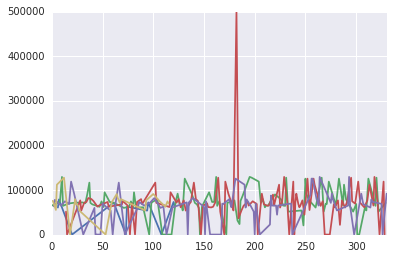

In [52]:
#%matplotlib inline
#ml.groupby('EDUCATION_LEVEL').GROSS_INCOME.plot(kind = 'bar')

In [5]:
### reformat the xBF character
ml.rename(columns={'﻿INSURANCE_POLICY_ID':'INSURANCE_POLICY_ID'}, inplace=True)

ml.dtypes

INSURANCE_POLICY_ID                 int64
CUSTOMER_ID                         int64
NUMBER_OF_COMMUNICATIONS            int64
GROSS_INCOME                        int64
AGE_OF_PARTY                        int64
CLAIMS_COUNT                        int64
CLAIMS_AMOUNT                       int64
NUMBER_OF_CLAIMS_DENIED             int64
EDUCATION_LEVEL                    object
EMPLOYMENT_STATUS                  object
GENDER                             object
MARITAL_STATUS                     object
SENTIMENT_SCORE                     int64
GROSS_PREMIUM                       int64
PREMIUM_AMOUNT                      int64
RENEWAL_DATE                       object
PAYMENT_FREQUENCY                  object
CHURN                               int64
CURRENT_ROW_INDICATOR               int64
REGION                             object
COUNTRY                            object
COMPETITIVE_PREMIUM_AMOUNT_MIN      int64
COMPETITIVE_PRICE                   int64
COUNTRY_NAME                      

In [30]:
display(ml)

INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL
10001830,1002372,1,65370,24,4,277,4,Graduate,Employed,M,Divorce,175,625,865,2018-4-01,YEARLY,0,1,OHIO,US,725,45,US,0,CENTRAL,430,4,12,DEBIT,LONG-TERM,NSF,2.0,GMC,2012,5.0,ACADIA,Phillips,Bank
10001831,1002373,2,76152,27,3,287,0,Professional,Selfemployed,M,Married,150,500,525,2018-4-02,MONTHLY,1,1,OHIO,US,525,100,US,0,CENTRAL,430,3,9,DEBIT,LONG-TERM,EVENT,0.0,FORD,2005,12.0,F150,Robinson,Bank
10001832,1002374,1,63863,26,4,237,17,PhD,Retired,U,Single,100,900,750,2018-4-03,MONTHLY,0,1,OHIO,US,750,100,US,1,CENTRAL,430,4,0,CASH,NEW,EVENT,2.0,GMC,2015,2.0,ACADIA,Robinson,Bank
10001833,1002375,0,78256,25,1,391,7,PhD,Unemployed,F,Single,111,600,700,2018-4-04,QUARTERLY,1,1,OHIO,US,800,125,US,0,CENTRAL,430,2,5,CASH,SHORT-TERM,DECEASED,2.0,BMW,2016,1.0,4SERIES,Mitchell,Agent
10001834,1002376,2,55635,21,3,331,2,Professional,Employed,F,Married,155,225,1200,2018-4-05,MONTHLY,0,1,OHIO,US,750,50,US,0,CENTRAL,430,1,3,DEBIT,LONG-TERM,EVENT,0.0,FORD,2005,12.0,F150,Rogers,Bank
10001835,1002377,2,112277,23,3,142,18,Professional,Employed,M,Married,120,250,900,2018-4-06,YEARLY,0,1,OHIO,US,800,100,US,0,CENTRAL,430,3,8,DEBIT,LONG-TERM,NSF,2.0,GMC,2012,5.0,ACADIA,Phillips,Bank
10001836,1002378,3,61039,54,0,529,10,College,Selfemployed,F,Divorce,105,600,1000,2018-4-07,YEARLY,0,1,OHIO,US,925,75,US,0,CENTRAL,430,3,2,DEBIT,LONG-TERM,EVENT,0.0,FORD,2005,12.0,F150,Robinson,Bank
10001837,1002379,1,79238,66,0,568,8,College,Retired,F,Divorce,155,500,1000,2018-4-08,QUARTERLY,0,1,OHIO,US,550,100,US,0,CENTRAL,430,3,0,CASH,NEW,EVENT,2.0,GMC,2015,2.0,ACADIA,Robinson,Bank
10001838,1002380,0,73965,23,3,565,11,Graduate,Retired,U,Married,120,550,900,2018-4-09,YEARLY,0,1,OHIO,US,600,120,US,0,CENTRAL,430,3,0,CASH,SHORT-TERM,DECEASED,2.0,BMW,2016,1.0,4SERIES,Mitchell,Agent
10001839,1002381,0,65447,27,4,337,0,PhD,Unemployed,M,Divorce,130,225,885,2018-4-10,YEARLY,0,1,OHIO,US,770,80,US,0,CENTRAL,430,2,1,DEBIT,LONG-TERM,EVENT,0.0,FORD,2005,12.0,F150,Rogers,Bank


In [122]:
#%pwd
mf = pd.read_csv('/gpfs/global_fs01/sym_shared/YPProdSpark/user/scc8-d44aeb3f7d9dd3-674d31d66b72/notebook/work/merged_ab.csv')
mf.shape

(331, 39)

In [8]:
%ls -l
%pwd

total 384
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users 64526 Aug  7 12:53 merge_ab_chyl1.csv
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users 64526 Aug 11 08:26 merged_ab.csv


u'/gpfs/global_fs01/sym_shared/YPProdSpark/user/scc8-d44aeb3f7d9dd3-674d31d66b72/notebook/work'

In [3]:
import numpy as np
func = lambda x: np.log(x) + np.sqrt(x) + np.pi + np.cos(x**2)
func(2)

4.5953097756592216

In [ ]:
squared = lambda x: x**2
squared(2)

In [7]:
%time
quad = lambda x, y: (x+3)*(y**5)
quad(2,4)

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 5.96 µs


5120

In [99]:
mf['new_test'] = mf.GROSS_INCOME.apply(squared)
#mf.new_test.describe()
mf.new_test.head()

0    4273236900
1    5799127104
2    4078482769
3    6124001536
4    3095253225
Name: new_test, dtype: int64

In [100]:
mf.drop('new_test', axis = 1, inplace = True)
mf.shape

(331, 39)

In [101]:
gd = pd.get_dummies(mf.GENDER, prefix = 'GENDER')
mf = pd.concat([mf, gd], axis=1)
#mf.EDUCATION_LEVEL.describe()
#mf.head()
#gd.dtypes
#mf.shape

(331, 42)

In [154]:
#mf.GENDER_U.isnull().value_counts()
#pd.isnull(mf.GENDER).sum()
#mf.GENDER_U.isnull().sum()
#mf.sort_values('GENDER_U').tail()

0

In [129]:
### only selecting designated series or columns
ml = pd.read_csv('merge_ab_chyl1.csv')
response = ml.pop('CHURN')
response.head()

0    0
1    1
2    0
3    1
4    0
Name: CHURN, dtype: int64

In [132]:
### after pop, the remainders can be redefined into the dataframe obj - good for independent and dep variables split
features = ml
features.shape

(331, 38)

In [139]:
ml = pd.read_csv('merge_ab_chyl1.csv')
#ml.AUTO_MAKE.value_counts()
#ml[(ml.AUTO_MAKE == 'BMW') | (ml.AUTO_MAKE == 'HONADA')].head()
ml[(ml.AUTO_MAKE == 'BMW')].head()

,﻿INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL
3,10001833,1002375,0,78256,25,1,391,7,PhD,Unemployed,F,Single,111,600,700,2018-4-04,QUARTERLY,1,1,OHIO,US,800,125,US,0,CENTRAL,430,2,5,CASH,SHORT-TERM,DECEASED,2,BMW,2016,1,4SERIES,Mitchell,Agent
8,10001838,1002380,0,73965,23,3,565,11,Graduate,Retired,U,Married,120,550,900,2018-4-09,YEARLY,0,1,OHIO,US,600,120,US,0,CENTRAL,430,3,0,CASH,SHORT-TERM,DECEASED,2,BMW,2016,1,4SERIES,Mitchell,Agent
10,10001840,1002382,6,129728,41,1,337,7,Graduate,Employed,M,Married,135,600,600,2018-4-11,QUARTERLY,1,1,OHIO,US,900,90,US,0,CENTRAL,430,2,16,CASH,SHORT-TERM,NSF,3,BMW,2016,1,4SERIES,Moore,Bank
14,10001844,1002386,1,51933,24,2,170,7,High School,Employed,M,Single,100,700,550,2018-4-15,MONTHLY,0,1,OHIO,US,655,120,US,1,CENTRAL,430,2,0,CASH,SHORT-TERM,DECEASED,2,BMW,2015,2,4SERIES,Walker,Agent
18,10001848,1002390,1,519,37,3,153,0,Professional,Retired,M,Single,125,500,865,2018-4-19,QUARTERLY,0,1,OHIO,US,525,45,US,0,CENTRAL,430,2,1,CASH,SHORT-TERM,DECEASED,4,BMW,2014,3,4SERIES,Martinez,Agent


In [9]:
ml = pd.read_csv('merge_ab_chyl1.csv')
ml.rename(columns={'﻿INSURANCE_POLICY_ID':'INSURANCE_POLICY_ID'}, inplace=True)
col_sel = ['INSURANCE_POLICY_ID','NUMBER_OF_COMMUNICATIONS','GROSS_INCOME','CHURN ']
ml_sel = ml.loc[:, col_sel]
ml_sel.dtypes

INSURANCE_POLICY_ID           int64
NUMBER_OF_COMMUNICATIONS      int64
GROSS_INCOME                  int64
CHURN                       float64
dtype: object

In [2]:
%ls -l
%pwd

total 384
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users 64523 Aug 28 08:53 merge_ab_chyl1.csv
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users 64526 Aug 11 08:26 merged_ab.csv


u'/gpfs/global_fs01/sym_shared/YPProdSpark/user/scc8-d44aeb3f7d9dd3-674d31d66b72/notebook/work'

In [6]:
## put ? mark to get more details
# pd.concat?

In [2]:
'I generally like to eat {} but, occasionally, like to eat {}'.format('dumpling', 'pizza')

'I generally like to eat dumpling but, occasionally, like to eat pizza'

In [10]:
## string format practice
class fun(object):
    type = 'toy'
    kinds = [{'item':'xbox'}, {'item':'puzzle'}]
 
'{f.type} --> {f.kinds[1][item]}'.format(f=fun())

'toy --> puzzle'

In [21]:
'{} :$$$$: {}'.format('wow', 'FIFA#2')

'wow :$$$$: FIFA#2'

In [24]:
#The new-style simple formatter calls by default the __format__() method of an object for its representation. 
#If you just want to render the output of str(...) or repr(...) you can use the !s or !r conversion flags.

class data(object):
    def __str__(self):
        return 'string'
    def __repr__(self):
        return 'repres'
    
'{0!s} : {0!r}'.format(data())    

'string : repres'

In [25]:
#The number behind a . in the format specifies the precision of the output. 
#For strings that means that the output is truncated to the specified length. In our example this would be 5 characters.
'{:.5}'.format('internationalism')

'inter'

In [28]:
'{:+d}'.format(667)

'+667'

In [37]:
data = {'first': 'Hodor', 'last': 'Hodor!', 'middle': "J"}

'{first} {middle}'.format(**data)

'Hodor J'

In [2]:
from datetime import datetime
'{:%Y-%m-%d %H:%M}'.format(datetime(2017, 2, 3, 4, 5))

'2017-02-03 04:05'

In [3]:
### read in the data from community into pandas df: insert data link key
import pandas as pd
pd.read_csv('https://apsportal.ibm.com/exchange-api/v1/entries/3460a7906f329ea1523b6a0455c53757/data?accessKey=6b3a2ae134a9b5c5061f47a0fbb5c50b')

,example,intent
0,you can say what is php,capabilities
1,you can not change yourself?,capabilities
2,why should I use you,capabilities
3,where should I turn,capabilities
4,where is the poop deck on this ship,capabilities
5,Where are we,capabilities
6,what u know about car?,capabilities
7,what things can you turn on?,capabilities
8,what things can you do,capabilities
9,What's the speed,capabilities


In [18]:
!pip install beautifulsoup4

In [24]:
import requests
import urllib2
from bs4 import BeautifulSoup

url = 'https://www.ibm.com/watson-analytics?lnk=mpr_bua&lnk2=learn'
r = requests.get(url)
#print (r.text[0:200])

soup = BeautifulSoup(r.text, 'html.parser')
print (soup)

<!DOCTYPE html>

<html dir="ltr" lang="en-us">
<head>
<meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQAPUFdTDRAFXFJQAwkPUw=="};window.NREUM||(NREUM={}),__nr_require=function(t,n,e){function r(e){if(!n[e]){var o=n[e]={exports:{}};t[e][0].call(o.exports,function(n){var o=t[e][1][n];return r(o||n)},o,o.exports)}return n[e].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<e.length;o++)r(e[o]);return r}({1:[function(t,n,e){function r(t){try{s.console&&console.log(t)}catch(n){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,n,e){r(e.stack)}),s.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(s,function(t,n){return t}).join(", ")))},{}],2:[function(

In [25]:
!pip help
!pip list


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  search                      Search PyPI for packages.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  help                        Show help for commands.

General Options:
  -h, --help                  Show help.
  --isolated                  Run pip in an isolated mode, ignoring
                              environment variables and user conf

In [63]:
## class practice from Corey Schafer

class Employee:
    raise_amt = 1.04
    num_empl = 0
    
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first + "." + last + "@gmail.com"
        
        Employee.num_empl += 1   
     
    def fullname (self):
        return '{} {}'.format(self.first, self.last)
    
    def sal_inc(self):
        return int(self.pay*self.raise_amt)
            
emp_1 = Employee('Jack', 'Lee', 50000)
emp_2 = Employee('Peter', 'Lee', 60000)

        
#print (emp_1.email)
#print (emp_1.pay)
#print (Employee.num_empl)
#print (emp_1.fullname())
print (emp_1.sal_inc())

52000


In [2]:
# copied from Corey Schafer's function tutorial
month_days = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

def is_leap(year):
    """Return True for leap years, False for non-leap years."""

    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)


def days_in_month(year, month):
    """Return number of days in that month in that year."""

    if not 1 <= month <= 12:
        return 'Invalid Month'

    if month == 2 and is_leap(year):
        return 29

    return month_days[month]

print(days_in_month(2020, 2))

29


In [1]:
# locating current working directory
import os
os.getcwd()

'/gpfs/global_fs01/sym_shared/YPProdSpark/user/scc8-d44aeb3f7d9dd3-674d31d66b72/notebook/work'

In [1]:
import sys
sys.path

['',
 '/gpfs/fs01/user/scc8-d44aeb3f7d9dd3-674d31d66b72/.local/lib/python2.7/site-packages',
 u'/tmp/spark-20-ego-master/work/spark-2bea013d-62c2-446a-beec-cada100879d2/userFiles-88b2222b-66bc-4b21-a7f2-a4ce1a1d627c',
 '/usr/local/src/spark20master/spark/python/lib/py4j-0.10.3-src.zip',
 '/usr/local/src/spark20master/spark/python',
 '/usr/local/src/bluemix_jupyter_bundle.v61/provision/jupyter-ax-ext/cdsax_jupyter_extensions.egg',
 '/usr/local/src/bluemix_jupyter_bundle.v61/provision/site-python',
 '/usr/local/src/cognitive-assistant/cads_packages',
 '/usr/local/src/analytic-libs/spark-2.0/python-2.7',
 '/usr/local/src/analytic-libs/python',
 '/usr/local/src/wml-libs.v4/python-2.7',
 '/usr/local/src/wml-libs.v4/spark-2.0/python-2.7',
 '/usr/local/src/bluemix_jupyter_bundle.v61/notebook/lib/python27.zip',
 '/usr/local/src/bluemix_jupyter_bundle.v61/notebook/lib/python2.7',
 '/usr/local/src/bluemix_jupyter_bundle.v61/notebook/lib/python2.7/plat-linux2',
 '/usr/local/src/bluemix_jupyter_bu

In [2]:
import pandas as pd

url = 'http://public.dhe.ibm.com/software/analytics/solutions/en/fintech/stresstests_sample.csv'

df = pd.read_csv(url)
df.head()

,Scenario Set,Scenario Set Name,Scenario Name,Scenario Probability,Scenario Color,Scenario Variable,Scenario Start Time,Scenario Attribute,Time Evolution from Trigger,Time Evolution to Trigger,Trigger Holder,Scenario Shift Rule,Scenario Type,Scenario Replacement Value
0,NaN,Flight_to_Quality,BASE,0,NaN,:CX_IRC_TRS_All_ADD,0,NaN,NaN,NaN,NaN,NaN,parallel shift,0.00
1,NaN,NaN,NaN,NaN,NaN,:CX_IRC_IBK_All_ADD,0,NaN,NaN,NaN,NaN,NaN,parallel shift,0.00
2,NaN,NaN,NaN,NaN,NaN,:Spot_Price_Drive_Curve_Mult,0,NaN,NaN,NaN,NaN,NaN,constant factor,1.00
3,NaN,NaN,Stress Test,1,NaN,:CX_IRC_TRS_All_ADD,0,NaN,NaN,NaN,NaN,NaN,parallel shift,-0.01
4,NaN,NaN,NaN,NaN,NaN,:CX_IRC_IBK_All_ADD,0,NaN,NaN,NaN,NaN,NaN,parallel shift,0.01


In [9]:
import pandas as pd

url = 'http://public.dhe.ibm.com/software/analytics/solutions/en/fintech/curve_shifts_sample.csv'

df = pd.read_csv(url)
df.head(10)

,Scenario Set,Scenario Set Name,Scenario Name,Scenario Probability,Scenario Color,Scenario Variable,Scenario Start Time,Scenario Attribute,Time Evolution From Trigger,Time Evolution to Trigger,Trigger Holder,Scenario Shift Rule,Scenario Type,Scenario Replacement Value,Unnamed: 14
0,NaN,Interest_Rate_Curve_Shifts,BASE,1,NaN,:CX_IRC_All_ADD,0,NaN,@Forward Rate,@Constant,@Standard(),Trigger Time,parallel shift,0,NaN
1,NaN,NaN,Parallel +10bps,1,NaN,:CX_IRC_All_ADD,0,NaN,@Forward Rate,@Constant,@Standard(),Trigger Time,parallel shift,0.001,NaN
2,NaN,NaN,Parallel -10bps,1,NaN,:CX_IRC_All_ADD,0,NaN,@Forward Rate,@Constant,@Standard(),Trigger Time,parallel shift,-0.001,NaN
3,NaN,NaN,Steepening,1,NaN,:CX_IRC_All_ADD,0,NaN,@Forward Rate,@Constant,@Standard(),Trigger Time,non-parallel shift,Term,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0005
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0.0010
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,0.0015
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,0.0017
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182,0.0025
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,0.0030


In [10]:
df.fillna(0).head(5)

,Scenario Set,Scenario Set Name,Scenario Name,Scenario Probability,Scenario Color,Scenario Variable,Scenario Start Time,Scenario Attribute,Time Evolution From Trigger,Time Evolution to Trigger,Trigger Holder,Scenario Shift Rule,Scenario Type,Scenario Replacement Value,Unnamed: 14
0,0,Interest_Rate_Curve_Shifts,BASE,1,0,:CX_IRC_All_ADD,0,0,@Forward Rate,@Constant,@Standard(),Trigger Time,parallel shift,0,0.0000
1,0,0,Parallel +10bps,1,0,:CX_IRC_All_ADD,0,0,@Forward Rate,@Constant,@Standard(),Trigger Time,parallel shift,0.001,0.0000
2,0,0,Parallel -10bps,1,0,:CX_IRC_All_ADD,0,0,@Forward Rate,@Constant,@Standard(),Trigger Time,parallel shift,-0.001,0.0000
3,0,0,Steepening,1,0,:CX_IRC_All_ADD,0,0,@Forward Rate,@Constant,@Standard(),Trigger Time,non-parallel shift,Term,0.0000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0005
